In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy.fftpack
from scipy import stats
import random
from scipy.signal import hilbert
from scipy import interpolate
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

mpl.rcParams['text.color'] = 'red'
mpl.rcParams['xtick.color'] = 'r'
mpl.rcParams['ytick.color'] = 'r'
mpl.rcParams['axes.labelcolor'] = 'red'


---
# Singular value decomposition
---


In [2]:
# the matrix
A = [ [3,0,5], [8,1,3] ]

# Note differences from MATLAB: S is vector, V is V'
U,S,V = np.linalg.svd(A)

print(U), print(' ')
print(S), print(' ')
print(V)

[[-0.52138438  0.85332193]
 [-0.85332193 -0.52138438]]
 
[9.89086518 3.18916698]
 
[[-0.84833111 -0.08627374 -0.52238986]
 [-0.50518185 -0.16348607  0.84738634]
 [-0.15851066  0.98276607  0.09510639]]


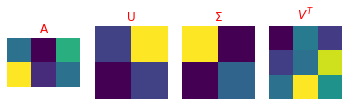

In [3]:
plt.subplot(141)
plt.imshow(A)
plt.title('A')
plt.axis('off')

plt.subplot(142)
plt.imshow(U)
plt.title('U')
plt.axis('off')

plt.subplot(143)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')
plt.axis('off')

plt.subplot(144)
plt.imshow(V)
plt.title('$V^T$')
plt.axis('off')

plt.show()

---
# Relation between singular values and eigenvalues
---

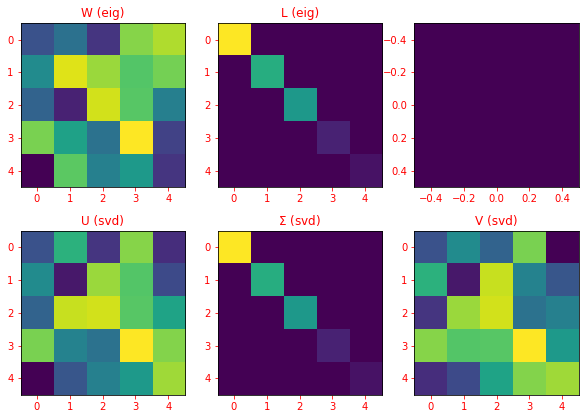

In [4]:
m = 5

# Create symmetric matrix
A = np.random.randn(m, m)
A = A.T @ A

L, W = np.linalg.eig(A)

U, s, V = np.linalg.svd(A)
# sort eigenvalues
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:, sidx]

# images of all matrices
fig, ax = plt.subplots(2, 3, figsize=(10, 7))
ax[0, 0].imshow(W)
ax[0, 0].set_title('W (eig)')
ax[0, 1].imshow(np.diag(L))
ax[0, 1].set_title('L (eig)')
ax[0, 2].imshow(np.zeros((1, 1)))

ax[1, 0].imshow(U)
ax[1, 0].set_title('U (svd)')
ax[1, 1].imshow(np.diag(s))
ax[1, 1].set_title('$\Sigma$ (svd)')
ax[1, 2].imshow(V)
ax[1, 2].set_title('V (svd)')

plt.show()

In [5]:
# Comparing U and V
print(np.round(U - V.T), 4)

[[-0.  0.  0.  0.  0.]
 [ 0.  0. -0.  0.  0.]
 [-0. -0. -0. -0.  0.]
 [ 0. -0. -0. -0.  0.]
 [ 0. -0. -0. -0.  0.]] 4


[[-0.7687  0.     -1.0559  0.9292 -0.    ]
 [-0.0692  0.      1.0311  0.6739 -0.    ]
 [-0.5718 -0.      1.2717  0.7    -0.    ]
 [ 0.873   0.     -0.396   1.4782 -0.    ]
 [-1.5215 -0.     -0.2186  0.085   0.    ]]


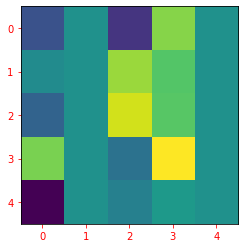

In [6]:
# Compare U and W
print(np.round(U + W, 4))
plt.imshow(np.round(U + W, 4))
plt.show()

[[-0.      0.4081 -0.      0.     -1.1243]
 [-0.     -1.3275  0.      0.     -0.846 ]
 [-0.      1.2314 -0.     -0.      0.2222]
 [-0.     -0.1931  0.     -0.      0.9266]
 [ 0.     -0.7194  0.     -0.      1.0547]]


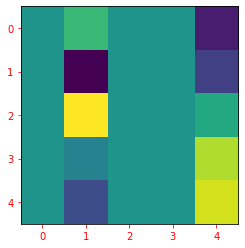

In [7]:
# Compare U and W
print(np.round(U - W, 4))
plt.imshow(np.round(U - W, 4))
plt.show()

In [8]:
np.round(V + W, 4)

array([[-0.7687, -0.2387, -0.8139,  0.9011, -0.1986],
       [ 0.1695, -0.    ,  1.1312,  0.2404,  0.0633],
       [-0.8139, -0.1002,  1.2717,  0.152 , -0.2204],
       [ 0.9011,  0.4335,  0.152 ,  1.4782, -0.4208],
       [-1.3229, -0.0633,  0.0018,  0.5058,  0.    ]])

In [9]:
np.round(np.diag(L) - np.diag(s), 4)

array([[-0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

---
# Relation between singular values and eigenvalues
---

In [143]:
# case 1: eig(A'A) vs. svd(A)

A = np.array([ [3,1,0], [1,1,0] ])

print(np.sort(np.linalg.eig(A.T @ A)[0]))
print(np.sort(np.linalg.svd(A)[1]**2))

[ 0.          0.34314575 11.65685425]
[ 0.34314575 11.65685425]


In [11]:
# case 2: eig(A'A) vs. svd(A'A)
print(np.sort(np.linalg.eig(A.T @ A)[0]))
print(np.sort(np.linalg.svd(A.T @ A)[1]))

[ 0.          0.34314575 11.65685425]
[ 0.          0.34314575 11.65685425]


In [12]:
# case 3a: eig(A) vs. svd(A), real-valued eigs

# need a square matrix for eig
A = [ [3,1,0], [1,1,0], [1,1,1]]

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))
# No relation

[0.58578644 1.         3.41421356]
[0.49384652 1.10038368 3.68039011]


In [13]:
# case 3b: eig(A) vs. svd(A), complex eigs

# random matrices are likely to give complex eigenvalues
A = np.random.randn(3, 3)

print(np.sort(np.linalg.eig(A)[0]))
print(np.sort(np.linalg.svd(A)[1]))
# singular values are always real vals 

[-0.94978405-0.22131054j -0.94978405+0.22131054j  0.38055304+0.j        ]
[0.16404639 1.2458581  1.77088991]


---
### Code challenge: U from eigendecomposition of A^TA
---

In [200]:
# Create a random 3x6 matrix
m = 3
n = 6
A = np.random.randn(m, n)

# SVD
Us, Ss, Vs = np.linalg.svd(A)

# eigen decomposition of A'A
L, V = np.linalg.eig(A.T @ A)

# sorting eigendecompostion
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:, sidx]

In [210]:
# Col 3, 4 and 5 are in null sapce of A
np.round(A @ np.reshape(V[:,3], (n,1)), 3)

array([[-0.+0.j],
       [-0.-0.j],
       [ 0.+0.j]])

In [204]:
# compute Vs==V
print(np.round(Vs.T + V, 2))

[[ 0.21+0.j    0.  +0.j   -1.48+0.j   -0.22-0.05j -0.44+0.05j -0.96+0.j  ]
 [ 1.14+0.j    0.  +0.j   -0.48+0.j    0.11+0.j    1.18+0.j    0.28+0.j  ]
 [ 1.11+0.j   -0.  +0.j    0.83+0.j   -0.31-0.2j  -0.5 +0.2j  -0.37+0.j  ]
 [ 1.11+0.j   -0.  +0.j    0.17+0.j    0.22+0.26j -0.4 -0.26j -0.29+0.j  ]
 [-0.39+0.j   -0.  +0.j    0.86+0.j   -0.06+0.09j  0.54-0.09j -1.3 +0.j  ]
 [ 0.23+0.j   -0.  +0.j    0.37+0.j   -0.02-0.08j -0.17+0.08j  0.54+0.j  ]]


In [205]:
print(np.round(L,4))
print(np.round(Ss**2,4))

[27.6371+0.j  2.6734+0.j  1.9654+0.j  0.    +0.j  0.    -0.j  0.    +0.j]
[27.6371  2.6734  1.9654]


In [206]:
# Creating U only from A, V and L
U = np.zeros((m, m))
for i in range(m):
    U[:,i] = (A @ V[:,i].T)/ np.sqrt(L[i])
    
print(np.round(U- Us, 4)), print(' ')
print(np.round(U + Us, 4))

[[ 0.     -1.9412 -0.    ]
 [ 0.      0.422   0.    ]
 [-0.     -0.2314  0.    ]]
 
[[ 0.4744 -0.      0.0809]
 [ 1.5164 -0.      1.2339]
 [-1.2147 -0.      1.5719]]


<ipython-input-206-3ed2cd6e4658>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  U[:,i] = (A @ V[:,i].T)/ np.sqrt(L[i])


---
### Code challenge: A^TA, Av, and singular vectors
---

In [18]:
m = 4
A = np.random.randn(m, m)

AtA = A.T @ A
AAt = A @ A.T
U, S, V = np.linalg.svd(AtA)

diff = np.zeros(m)
for i in range(m):
    diff[i] = sum((AAt @ A @ U[:,i] - A @ U[:,i] * S[i])**2)
    
print(diff)

[2.36735309e-30 2.61310175e-30 3.62267423e-31 5.49844159e-31]



---
# Spectral theory of matrices
---

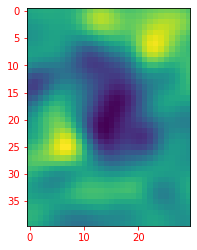

In [19]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

plt.imshow(A)
plt.show()

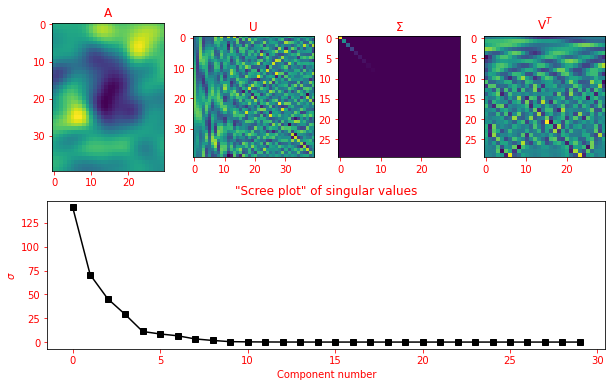

In [20]:
# SVD (remember that V comes out transposed)
U,S,V = np.linalg.svd(A)


# show the constituent matrices
fig = plt.subplots(1,figsize=(10,6))

plt.subplot(241)
plt.imshow(A)
plt.title('A')

plt.subplot(242)
plt.imshow(U)
plt.title('U')

plt.subplot(243)
plt.imshow(np.diag(S))
plt.title('$\Sigma$')

plt.subplot(244)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

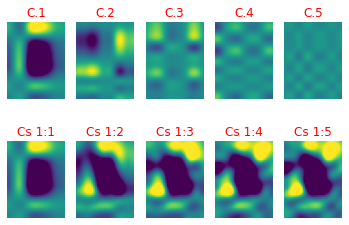

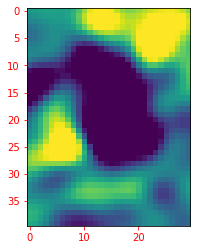

In [21]:
rank1mats = np.zeros((5,m,n))

for i in range(0,5):
    
    # create rank1 matrix
    rank1mats[i,:,:] = np.outer( U[:,i]*S[i],V[i,:] )
    
    plt.subplot2grid((2,5),(0,i))
    plt.imshow(rank1mats[i,:,:],vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('C.%d' %(i+1))
    
    plt.subplot2grid((2,5),(1,i))
    imdat = np.sum(rank1mats[:i+1,:,:],axis=0)
    plt.imshow(imdat,vmin=-5,vmax=5)
    plt.axis('off')
    plt.title('Cs 1:%d' %(i+1))

plt.show()

# then show the original
plt.imshow(A,vmin=-5,vmax=5)
plt.show()


---
# SVD for low-rank approximations
---


In [22]:
# number of components (singular "layers") to keep
nComps = 5

#  Reduced U S and V
Ur = U[:,0:nComps]
Sr = S[:nComps]
Vr = V[0:nComps, :]

# Low rank approximation
recoImg = Ur @ np.diag(Sr) @ Vr

# rank (confirm same as nComps)
print( 'rank =',np.linalg.matrix_rank(recoImg) )

rank = 5


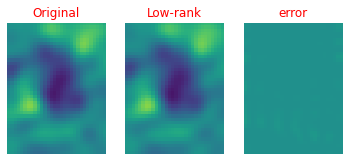

In [23]:
# error map and percent difference from original matrix
errorMap = (recoImg - A)**2
# show the results!
plt.subplot(131)
plt.imshow(A,vmin=-15,vmax=15)
plt.axis('off')
plt.title('Original')

plt.subplot(132)
plt.imshow(recoImg,vmin=-15,vmax=15)
plt.axis('off')
plt.title('Low-rank')

plt.subplot(133)
plt.imshow(errorMap,vmin=-15,vmax=15)
plt.axis('off')
plt.title('error')
plt.show()



---
# Convert singular values to percent variance
---


In [24]:
# matrix sizes
m = 40
n = 30

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = scipy.signal.convolve2d(np.random.randn(m,n),g2d,'same')

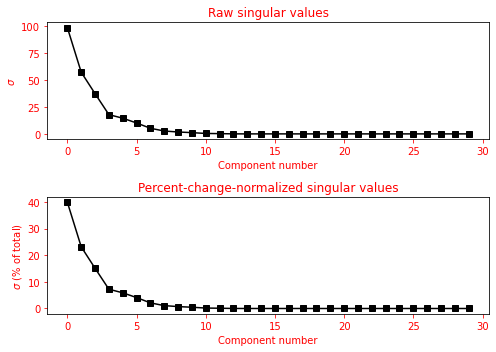

In [25]:
Ascaled = A*1

# SVD
U,s,V = np.linalg.svd(Ascaled)

# convert to percent variance
spct = 100*s/np.sum(s)

# plot the singular values for comparison
fig = plt.subplots(1,figsize=(7,5))

plt.subplot(211)
plt.plot(s,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('Raw singular values')

plt.subplot(212)
plt.plot(spct,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$ (% of total)')
plt.title('Percent-change-normalized singular values')

plt.tight_layout()
plt.show()

---
### Code challenge: When is UV^T valid, what is its norm, and is it orthogonal?
---

In [84]:
## Generate a matrix such that U*v' is valid
# Generate a square matrix
m = 4
A = np.random.randn(m, m)

# svd of A
U, S, V = np.linalg.svd(A)

## incued 2 Norm of U, V and U*V'
print(f'norm (U): {np.linalg.norm(U, 2)}')
print(f'norm (V): {np.linalg.norm(V, 2)}')
print(f'norm (U@V): {np.linalg.norm(U @ V, 2)}'), print(' ')


norm (U): 1.0
norm (V): 1.0000000000000002
norm (U@V): 1.0000000000000004
 


(None, None)

In [87]:

## Compute U*U', V*V' and U*V'
UUt = U @ U.T
VVt = V.T @ V
UVt = U @ V
# UUt and VVt will give identity matrix as both are orthogonal matrix
print(np.round(UUt, 3)), print(' ')
print(np.round(VVt, 3))

[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]
 
[[ 1. -0.  0. -0.]
 [-0.  1. -0.  0.]
 [ 0. -0.  1.  0.]
 [-0.  0.  0.  1.]]


In [92]:
print(UVt), print(' ')
print(np.round(UVt @ UVt.T, 3))
# U@V@(UV).T
# U @ V @ V.T @ U.T
# U @ I @ U.T [ V @ V.T = I ]
# U @ U.T = I

[[ 0.76069911  0.26154503 -0.47990336  0.35017685]
 [ 0.48569044 -0.49642717  0.67702138  0.2435301 ]
 [-0.4258061  -0.21946375 -0.16553665  0.8620455 ]
 [ 0.0642715  -0.79811648 -0.53285311 -0.27376416]]
 
[[ 1.  0. -0.  0.]
 [ 0.  1. -0.  0.]
 [-0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]


In [227]:
m = 4
A = np.random.randn(m, m)
Q, R = np.linalg.qr(A)
U, S, V = np.linalg.svd(Q)
# (1) Q'Q=I, 
# (2) all eigenvalues of I are 1,
# (3) singular values are squared eigenvalues of Q'Q.
print(S)

[1. 1. 1. 1.]


---
# SVD, matrix inverse, and pseudoinverse
---

In [240]:
# the matrix
A = [ [1,2,3],
      [1,2,4], 
      [1,2,5]  ]

# SVD
U, S, V = np.linalg.svd(A)

# pseudoinvert S
nonzeroels = S > 10**-14# find nonzero elements (>rounding errors)
S[nonzeroels] = 1/S[nonzeroels] # invert only those elements

# now pseudoinvert A
Ai = V.T@np.diag(S)@U.T

# it's sortof close to I...?
print( Ai@A ), print(' ')

# compute with pinv function
print( np.linalg.pinv(A)@A )

[[ 2.00000000e-01  4.00000000e-01  2.22044605e-16]
 [ 4.00000000e-01  8.00000000e-01 -2.22044605e-16]
 [-5.55111512e-17 -1.11022302e-16  1.00000000e+00]]
 
[[ 2.00000000e-01  4.00000000e-01  2.22044605e-16]
 [ 4.00000000e-01  8.00000000e-01 -2.22044605e-16]
 [-1.11022302e-16 -2.22044605e-16  1.00000000e+00]]


---
# Condition number of a matrix
---


63.63322124937743 1.654907469924395e-06


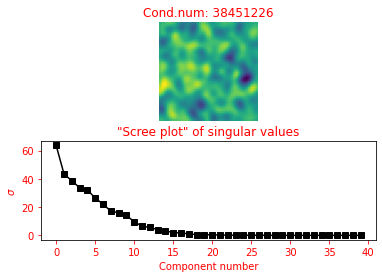

In [248]:

# matrix sizes
m = 40

# define a 2D Gaussian for smoothing
k = int( (m+n)/4 )
xx = np.linspace(-3,3,k)
[X,Y] = np.meshgrid(xx,xx)
g2d = np.exp(-(X**2 + Y**2) / (k/8))

# matrix
A = np.random.randn(m,m)
A = scipy.signal.convolve2d(A,g2d,'same')



# SVD
S = np.linalg.svd(A)[1]

# compute condition number
condnum = S[0]/S[-1]
print(S[0],S[-1])

# show the matrix
plt.subplot(211)
plt.imshow(A)
plt.axis('off')
plt.title('Cond.num: %d' %condnum)

plt.subplot(212)
plt.plot(S,'ks-')
plt.xlabel('Component number')
plt.ylabel('$\sigma$')
plt.title('"Scree plot" of singular values')

plt.show()

NotImplementedError: It is not currently possible to manually set the aspect on 3D axes

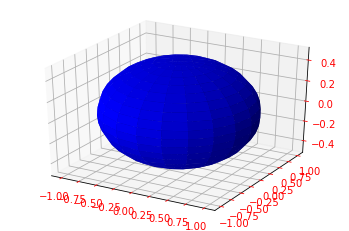

In [255]:
## sphere

# the transformation matrix T
T = np.eye(3)
T[-1,-1] = .5


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Make data
n = 21
u = np.linspace(0, 2*np.pi,n)
v = np.linspace(0, np.pi,n)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# put coords in a matrix to be transformed
M = np.concatenate( (np.reshape(x,(n*n,1)),np.reshape(y,(n*n,1)),np.reshape(z,(n*n,1))) ,axis=1)

# apply the transformation matrix to the coordinates
TM = T@M.T

# get out the new coordinates
xp = np.reshape(TM[0,:],(n,n))
yp = np.reshape(TM[1,:],(n,n))
zp = np.reshape(TM[2,:],(n,n))

# Plot the surface
ax.plot_surface(xp,yp,zp, color='b')
ax.axis('square')
ax.set_xlim3d(-1,1)
ax.set_ylim3d(-1,1)
ax.set_zlim3d(-1,1)

plt.show()

---
### Code challenge: Create matrix with desired condition number
---

In [268]:
m = 6
n = 16

# Condition no
condno = 23.78

# Create U and R
U, junk = np.linalg.qr(np.random.randn(m, m))
V, junk = np.linalg.qr(np.random.randn(n, n))

# create singular values
s = np.linspace(condno, 1, min(m, n))

# create S matrix
S = np.zeros((m, n))
for i in range(len(s)):
    S[i,i] = s[i]
    
# Create A matrix
A = U @ S @ V.T

print(f'cond(A) : {np.linalg.cond(A)}'), print(' ')
print(np.round(A, 2))

cond(A) : 23.780000000000012
 
[[  3.03   2.09   0.08  -1.53   3.01   1.5   -8.63   4.64  -2.41   0.88
   -3.7    3.72   1.5   -0.93  -1.24  -7.32]
 [ -1.14   0.12   1.62   1.35  -0.31   3.51  -0.82  -8.21   3.35   1.63
   -3.21  -3.33  -0.38   1.28  -3.59   0.17]
 [  0.47  -5.33   2.36  -0.23   1.5   -3.18   1.81   1.58  -0.23  -0.63
    1.16   2.32   5.95   0.31  -0.36   0.86]
 [ -0.96  -3.98  -5.49   4.79  -1.09  -3.37   5.66   4.23  -1.78  -4.54
    3.71  -1.39  -4.08  -4.2    3.21   6.8 ]
 [ -1.52  -4.13   2.47   1.62  -0.73   3.13   2.66  -9.18   3.19  -1.18
   -1.33  -3.82   1.71   2.25  -2.78   0.47]
 [ -2.8   -6.37  -0.32   0.73  -1.96   1.44   5.06  -4.54  -1.91 -13.09
    2.39  -6.07  -6.38   1.16   2.62  -5.71]]


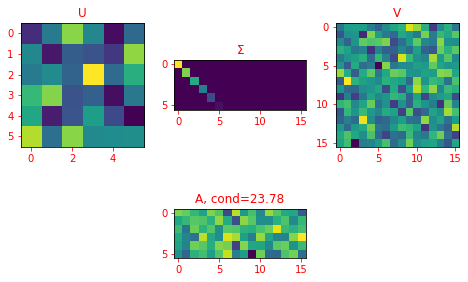

In [269]:
# plotting 
fig = plt.subplots(1, figsize=(8, 5))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V)
plt.title('V')

plt.subplot(235)
plt.imshow(A)
plt.title('A, cond=%g'%condno)

plt.show()